In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rokha\anaconda3\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rokha\anaconda3\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\rokha\anaconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
train_data = pd.read_excel('Data_Train.xlsx')

In [3]:
test_data = pd.read_excel('Test_set.xlsx')

In [4]:
data = train_data.copy()

In [5]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [6]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [8]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:
    change_into_datetime(feature)

In [10]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [11]:
data['journey_day']=data['Date_of_Journey'].dt.day
data['journey_month']=data['Date_of_Journey'].dt.month
data['journey_year']=data['Date_of_Journey'].dt.year

In [12]:
def extract_hr_min(df, col):
    df[col + "_hour"]= df[col].dt.hour
    df[col+ "_minute"]=df[col].dt.minute
    return df.head()

In [13]:
extract_hr_min(data,'Dep_Time')
extract_hr_min(data,'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-08 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-08 05:50:00,2024-01-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-08 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-01-08 18:05:00,2024-01-08 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-01-08 16:50:00,2024-01-08 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [14]:
cols_to_drop = ['Arrival_Time','Dep_Time']
data.drop(cols_to_drop, axis=1,inplace=True)

Data Analysis

In [15]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_month', 'journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [16]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<12):
        return "Morning"
    elif (x>12) and(x<=16):
        return "Noon"
    elif (x>16) and (x <=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "late night"
    

In [17]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [18]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind ='bar')

In [19]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [20]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' +' ' + x
    elif 'm' not in x:
        x = x+ ' ' +'0m'
    return x

In [21]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [22]:
data['Duration_hours']=data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [23]:
data['Duration_hours']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hours, Length: 10683, dtype: int64

In [24]:
data['Duration_min'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [25]:
data['Duration_min']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_min, Length: 10683, dtype: int64

In [26]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,2
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,7


In [27]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

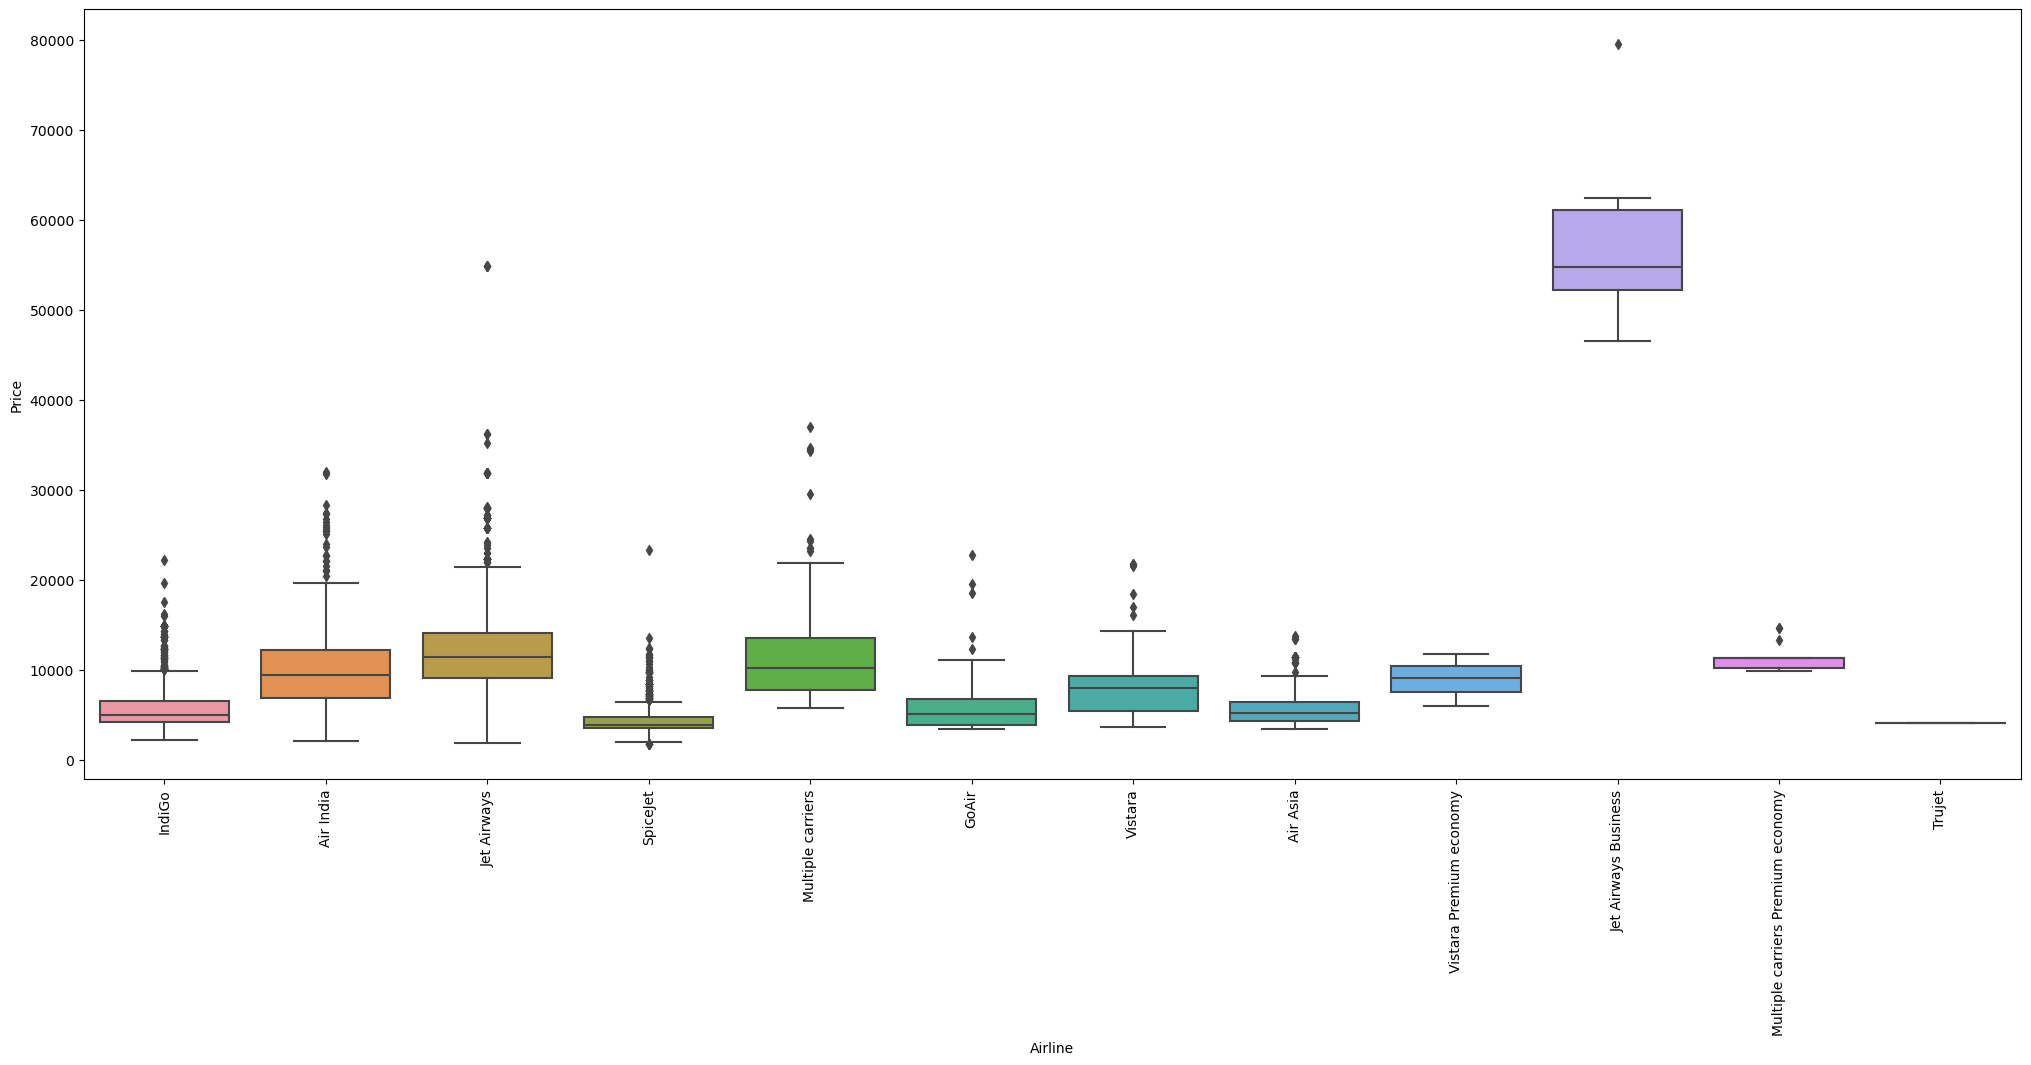

In [28]:
plt.figure(figsize=(25,10))
sns.boxplot(y='Price', x ='Airline', data= data)
plt.xticks(rotation=90)

<h1>Future Encoding</h1>


converting string data or categorical data to numerical values
is called future encoding data

one hot encoding
label encoder


In [29]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [30]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

In [31]:
num_col

['Date_of_Journey',
 'Price',
 'journey_day',
 'journey_month',
 'journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_min']

In [32]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [33]:
   for sub_category in data['Source'].unique():
        data['Souce_' +sub_category ] = data['Source'].apply(lambda x: 1 if x == sub_category else 0)

In [34]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Souce_Banglore,Souce_Kolkata,Souce_Delhi,Souce_Chennai,Souce_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,20,1,10,2,2,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,50,13,15,7,7,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,25,4,25,19,19,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,5,23,30,5,5,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,50,21,35,4,4,1,0,0,0,0


In [35]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [36]:
data['Airline'].nunique()

12

In [37]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [38]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [39]:
dic_airlines={key: index for index, key in enumerate(airlines, 0)}

In [40]:
dic_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [41]:
data['Airline']=data['Airline'].map(dic_airlines)

In [42]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Souce_Banglore,Souce_Kolkata,Souce_Delhi,Souce_Chennai,Souce_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,20,1,10,2,2,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,50,13,15,7,7,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,25,4,25,19,19,0,0,1,0,0


In [43]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [44]:
data['Destination'].replace('New Delhi','Delhi', inplace=True)

In [45]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [46]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [47]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [48]:
dict_dist={key: index for index, key in enumerate(dest, 0)}

In [49]:
dict_dist

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [50]:
data['Destination']=data['Destination'].map(dict_dist)

In [51]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Souce_Banglore,Souce_Kolkata,Souce_Delhi,Souce_Chennai,Souce_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,20,1,10,2,2,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,50,13,15,7,7,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,25,4,25,19,19,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,5,23,30,5,5,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,50,21,35,4,4,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,2019-04-09,Kolkata,3,CCU → BLR,2h 30m,non-stop,No info,4107,9,...,55,22,25,2,2,0,1,0,0,0
10679,7,2019-04-27,Kolkata,3,CCU → BLR,2h 35m,non-stop,No info,4145,27,...,45,23,20,2,2,0,1,0,0,0
10680,10,2019-04-27,Banglore,2,BLR → DEL,3h 0m,non-stop,No info,7229,27,...,20,11,20,3,3,1,0,0,0,0
10681,5,2019-03-01,Banglore,2,BLR → DEL,2h 40m,non-stop,No info,12648,1,...,30,14,10,2,2,1,0,0,0,0


In [52]:
data.dropna(inplace=True)

In [53]:
data.isnull().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Duration               0
Total_Stops            0
Additional_Info        0
Price                  0
journey_day            0
journey_month          0
journey_year           0
Dep_Time_hour          0
Dep_Time_minute        0
Arrival_Time_hour      0
Arrival_Time_minute    0
Duration_hours         0
Duration_min           0
Souce_Banglore         0
Souce_Kolkata          0
Souce_Delhi            0
Souce_Chennai          0
Souce_Mumbai           0
dtype: int64

In [54]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [55]:
stop= {'non-stop': 0, '2 stops': 2, '1 stop':1, '3 stops':3, '4 stops':4}

In [56]:
data['Total_Stops']=data['Total_Stops'].map(stop)

In [57]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [58]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_month', 'journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_min', 'Souce_Banglore', 'Souce_Kolkata', 'Souce_Delhi',
       'Souce_Chennai', 'Souce_Mumbai'],
      dtype='object')

In [59]:
data.drop(columns=['Additional_Info','Date_of_Journey', 'Source','journey_year'], axis = 1, inplace=True)

In [60]:
data.drop(columns=['Route', 'Duration'], axis =1, inplace=True)

In [61]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)
    
    sns.displot(df[col], ax=ax1)
    
    sns.boxplot(df[col], ax=ax2)
    
    sns.displot(df[col], ax=ax3, kde = False)

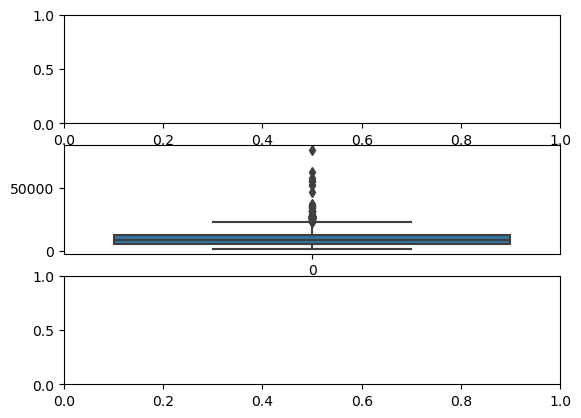

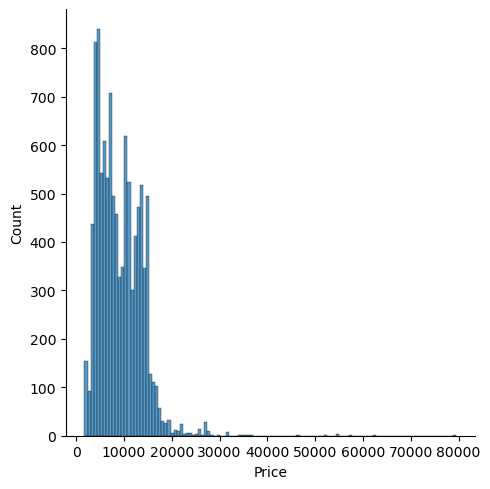

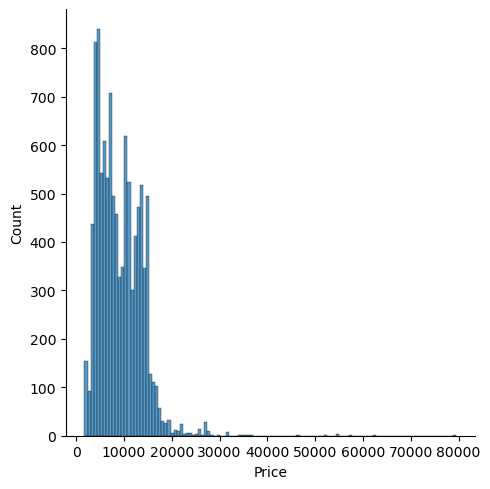

In [62]:
plot(data, 'Price')

In [63]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3 - q1

max = q3 + 1.5*iqr
mim= q1 - 1.5*iqr

In [64]:
print(max)

23017.0


In [65]:
print(mim)

-5367.0


In [66]:
print([price for price in data['Price'] if price> max or price<mim])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [67]:
len([price for price in data['Price'] if price> max or price<mim])

94

In [68]:
data['Price']=np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

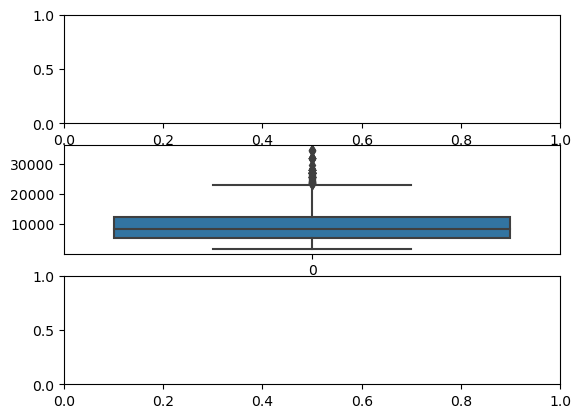

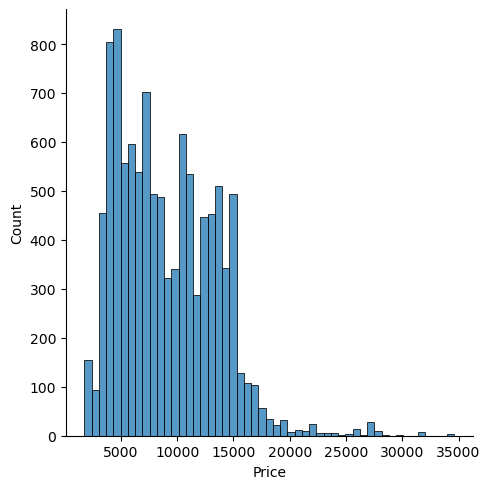

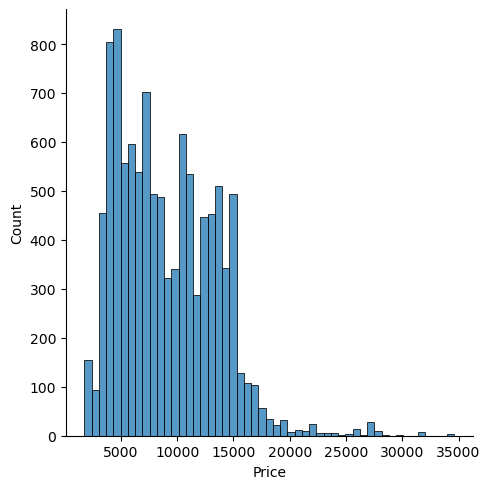

In [69]:
plot(data, 'Price')

In [70]:
x = data.drop(['Price'], axis = 1)

In [71]:
y = data['Price']

In [72]:
from sklearn.feature_selection import mutual_info_regression

In [73]:
imp = mutual_info_regression(x,y)

In [74]:
imp

array([0.9672809 , 1.00120022, 0.78436309, 0.23166135, 0.62836286,
       0.34093905, 0.25986305, 0.40411866, 0.34840255, 0.46246249,
       0.46556903, 0.39150219, 0.4679375 , 0.52826451, 0.13993399,
       0.19249873])

In [77]:
imp_df = pd.DataFrame(imp, index=x.columns)

In [81]:
imp_df.columns = ['Importance']

In [83]:
imp_df.sort_values(by='Importance', ascending = False)

,Importance
Destination,1.001200
Airline,0.967281
Total_Stops,0.784363
journey_month,0.628363
Souce_Delhi,0.528265
Souce_Kolkata,0.467937
Duration_min,0.465569
Duration_hours,0.462462
Arrival_Time_hour,0.404119
Souce_Banglore,0.391502


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
ml_model=RandomForestRegressor()

In [91]:
ml_model.fit(x_train, y_train)

RandomForestRegressor()

In [94]:
y_pred = ml_model.predict(x_test)

In [96]:
from sklearn.metrics import r2_score

In [97]:
r2_score(y_test, y_pred)

0.8067492775817884

In [98]:
import pickle

In [99]:

file = open('rf_random_forest.pkl','wb')

In [101]:
pickle.dump(ml_model, file)

In [104]:
model = open('rf_random_forest.pkl', 'rb')

In [105]:
forest = pickle.load(model)

In [108]:
y_pred2 = forest.predict(x_test)

In [109]:
r2_score(y_test, y_pred)

0.8067492775817884